Stock Price Prediction using LSTM

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Collect the Stock Data

In [3]:
df = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/intc.us.txt", sep=',')
df = df[df['Date']>'1990-01-01']
df

,Date,Open,High,Low,Close,Volume,OpenInt
4534,1990-01-02,0.8579,0.8982,0.8499,0.8982,79600273,0
4535,1990-01-03,0.8982,0.9061,0.8740,0.8740,86671242,0
4536,1990-01-04,0.8820,0.8982,0.8579,0.8904,72928342,0
4537,1990-01-05,0.8904,0.8982,0.8820,0.8820,46184758,0
4538,1990-01-08,0.8904,0.9061,0.8820,0.8982,54001929,0
...,...,...,...,...,...,...,...
11551,2017-11-06,46.6000,46.7400,46.0900,46.7000,34006271,0
11552,2017-11-07,46.7000,47.0900,46.6400,46.7800,24422113,0
11553,2017-11-08,46.6200,46.7000,46.2800,46.7000,21556947,0
11554,2017-11-09,46.0500,46.3900,45.6500,46.3000,25564257,0


In [4]:
df2 = df.reset_index()['Close']
df2.head()

0    0.8982
1    0.8740
2    0.8904
3    0.8820
4    0.8982
Name: Close, dtype: float64

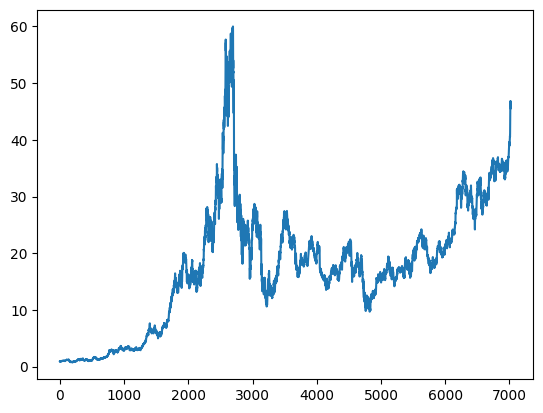

In [5]:
plt.plot(df2)
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))
print(df2)

[[0.00284151]
 [0.00243317]
 [0.0027099 ]
 ...
 [0.77568245]
 [0.76893302]
 [0.75678403]]


# Preprocessing data with Train and Test

In [7]:
train_dataset_size = int(len(df2) * 0.70)
test_dataset_size = int(len(df2) - train_dataset_size)
train_data, test_data = df2[0:train_dataset_size], df2[train_dataset_size: len(df2)]

In [8]:
## Convert an arrary of values in dataset matrix
def Create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i: (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[ i + time_step , 0])
    return np.array(dataX), np.array(dataY)

In [9]:
## Reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = Create_dataset(train_data, time_step)
X_test, y_test = Create_dataset(test_data, time_step)

In [10]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4814, 100)
(4814,)
(2006, 100)
(2006,)


# Create an Stacked LSTM Model

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(4814, 100, 1)
(2006, 100, 1)


In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

print("Done")

Epoch 1/100
76/76 [==============================] - 8s 34ms/step - loss: 0.0062 - val_loss: 3.4689e-04
Epoch 2/100
76/76 [==============================] - 1s 15ms/step - loss: 7.2581e-04 - val_loss: 3.2944e-04
Epoch 3/100
76/76 [==============================] - 1s 15ms/step - loss: 6.3258e-04 - val_loss: 4.7659e-04
Epoch 4/100
76/76 [==============================] - 1s 15ms/step - loss: 5.8063e-04 - val_loss: 2.3935e-04
Epoch 5/100
76/76 [==============================] - 1s 15ms/step - loss: 5.8060e-04 - val_loss: 4.4653e-04
Epoch 6/100
76/76 [==============================] - 1s 15ms/step - loss: 4.5645e-04 - val_loss: 7.6653e-04
Epoch 7/100
76/76 [==============================] - 1s 17ms/step - loss: 4.0096e-04 - val_loss: 2.4216e-04
Epoch 8/100
76/76 [==============================] - 1s 15ms/step - loss: 4.4606e-04 - val_loss: 2.1549e-04
Epoch 9/100
76/76 [==============================] - 1s 14ms/step - loss: 3.5566e-04 - val_loss: 2.1895e-04
Epoch 10/100
76/76 [============

In [14]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [15]:
## Lets do prediction and check performance matrix.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

## Transform to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

63/63 [==============================] - 0s 5ms/step


# Predict the test data and plot the output

In [16]:
## Calculate RMSE for Performance Metrics
math.sqrt(mean_squared_error(y_train, train_predict))

18.239086827892965

In [17]:
## Test data for RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

25.336480977901164

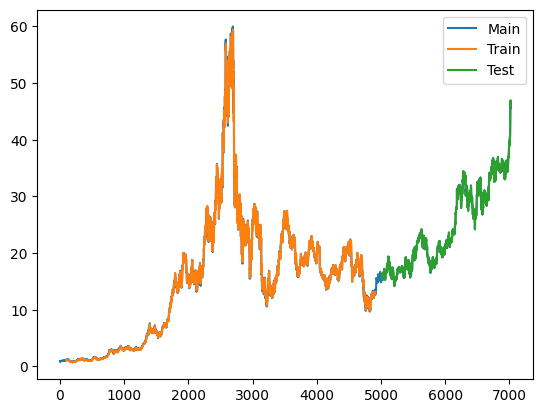

In [18]:
## Plotting 
## Shift Train prediction for plotting
look_back = 100
train_predict_plot = np.empty_like(df2)
train_predict_plot[:,:] = np.nan 
train_predict_plot[look_back: len(train_predict)+look_back, : ] = train_predict

## Shifting Test Prediction for Plotting 
test_predict_plot = np.empty_like(df2)
test_predict_plot[:, :] = np.nan 
test_predict_plot[len(train_predict)+ (look_back*2)+1 : len(df2)-1, :] = test_predict

## Plot Baseline and Prediction
plt.plot(scaler.inverse_transform(df2), label="Main")
plt.plot(train_predict_plot, label="Train")
plt.plot(test_predict_plot, label="Test")
plt.legend()
plt.show()

# Predict the future 30 days and plot the output

In [19]:
len(test_data)

2107

In [20]:
x_input = test_data[len(test_data)-100 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [21]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input[-20:]

[0.654665042302098,
 0.6551712500970232,
 0.6628824821730488,
 0.6601995808599458,
 0.6659028553494353,
 0.6726185454287749,
 0.674626503015311,
 0.6717748657705663,
 0.6813421930946507,
 0.732502927568414,
 0.7319967197734888,
 0.7507939025583742,
 0.7712615710665124,
 0.7778085252142103,
 0.7650520887820977,
 0.7756824524755249,
 0.7770323399286584,
 0.7756824524755249,
 0.7689330152098568,
 0.7567840281316545]

In [22]:
lst_output = []
n_steps = 100
i = 0

while(i<30):
    if(len(temp_input)>100):
#         print(temp_input)
        x_input = np.array(temp_input[1:])
#         print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

[0.7559086]
101
1 day output [[0.75767905]]
2 day output [[0.76017886]]
3 day output [[0.75600576]]
4 day output [[0.7553523]]
5 day output [[0.7533582]]
6 day output [[0.7493362]]
7 day output [[0.74570864]]
8 day output [[0.7413607]]
9 day output [[0.7365326]]
10 day output [[0.73188776]]
11 day output [[0.7272604]]
12 day output [[0.72282237]]
13 day output [[0.71873546]]
14 day output [[0.7149565]]
15 day output [[0.71150625]]
16 day output [[0.7083786]]
17 day output [[0.70552415]]
18 day output [[0.70291305]]
19 day output [[0.70051485]]
20 day output [[0.69829893]]
21 day output [[0.6962469]]
22 day output [[0.6943457]]
23 day output [[0.69258624]]
24 day output [[0.6909626]]
25 day output [[0.6894686]]
26 day output [[0.6880974]]
27 day output [[0.68683964]]
28 day output [[0.68568414]]
29 day output [[0.68461627]]


In [23]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
len(df2)

7022

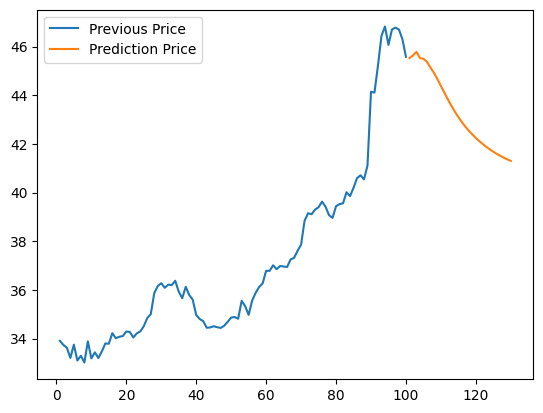

In [24]:
plt.plot(day_new, scaler.inverse_transform(df2[len(df2)-100:]), label="Previous Price")
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Prediction Price")
plt.legend(loc="upper left")
plt.show()